In [8]:
import os

# list of the .nii.gz files containing "XX" in /home/debi/jaime/repos/MR-EyeTrack/results/bids/derivatives/reconstructions/sub-001/anat
files = [f for f in os.listdir("/home/debi/jaime/repos/MR-EyeTrack/results/bids/derivatives/reconstructions/sub-001/anat") if "mathilda" in f and f.endswith(".nii.gz")]
print(files)
print(len(files))

['sub-001_acq-left_rec-mathilda95p_T1w.nii.gz', 'sub-001_acq-left_rec-mathilda50p_T1w.nii.gz', 'sub-001_acq-down_rec-mathilda75p_T1w.nii.gz', 'sub-001_acq-left_rec-mathildafull_T1w.nii.gz', 'sub-001_acq-down_rec-mathildafull_T1w.nii.gz', 'sub-001_acq-right_rec-mathilda75p_T1w.nii.gz', 'sub-001_acq-down_rec-mathilda95p_T1w.nii.gz', 'sub-001_acq-right_rec-mathilda95p_T1w.nii.gz', 'sub-001_rec-mathildaFull_T1w.nii.gz', 'sub-001_acq-left_rec-mathilda75p_T1w.nii.gz', 'sub-001_acq-up_rec-mathilda95p_T1w.nii.gz', 'sub-001_acq-down_rec-mathilda50p_T1w.nii.gz', 'sub-001_acq-up_rec-mathilda50p_T1w.nii.gz', 'sub-001_acq-up_rec-mathilda75p_T1w.nii.gz', 'sub-001_acq-right_rec-mathildafull_T1w.nii.gz', 'sub-001_acq-up_rec-mathildafull_T1w.nii.gz', 'sub-001_acq-right_rec-mathilda50p_T1w.nii.gz']
17


mathilda

In [7]:
import nibabel as nib
import numpy as np

img = nib.load("/home/debi/jaime/repos/MR-EyeTrack/results/bids/derivatives/reconstructions/sub-001/anat/sub-001_acq-down_rec-mathilda50p_T1w.nii.gz")
data = img.get_fdata()

print("Shape:", data.shape)
print("Data type:", data.dtype)
print("Min:", np.nanmin(data))
print("Max:", np.nanmax(data))
print("Mean:", np.nanmean(data))
print("Std Dev:", np.nanstd(data))
print("Unique NaNs:", np.isnan(data).sum())
print("Unique zeros:", np.sum(data == 0))

Shape: (240, 240, 240)
Data type: float64
Min: 2.1580270185950212e-05
Max: 2.7250845432281494
Mean: 0.32303552501063454
Std Dev: 0.3126508043797188
Unique NaNs: 0
Unique zeros: 0


steva

In [8]:
import nibabel as nib
import numpy as np

img2 = nib.load("/home/debi/jaime/repos/MR-EyeTrack/results/bids/derivatives/reconstructions/sub-001/anat/sub-001_acq-down_rec-steva50p_T1w.nii.gz")
data2 = img2.get_fdata()
print("Shape:", data2.shape)
print("Data type:", data2.dtype)
print("Min:", np.nanmin(data2))
print("Max:", np.nanmax(data2))
print("Mean:", np.nanmean(data2))
print("Std Dev:", np.nanstd(data2))
print("Unique NaNs:", np.isnan(data2).sum())
print("Unique zeros:", np.sum(data2 == 0))

Shape: (240, 240, 240)
Data type: float64
Min: 5.878232059330912e-06
Max: 2.617967128753662
Mean: 0.22170711435412643
Std Dev: 0.3674576268381061
Unique NaNs: 0
Unique zeros: 0


SHIP ref

In [9]:
import nibabel as nib
import numpy as np

img3 = nib.load("/home/debi/Desktop/tmp/webplatform/input/2022160100001.nii.gz")
data3 = img3.get_fdata()
print("Shape:", data3.shape)
print("Data type:", data3.dtype)
print("Min:", np.nanmin(data3))
print("Max:", np.nanmax(data3))
print("Mean:", np.nanmean(data3))
print("Std Dev:", np.nanstd(data3))
print("Unique NaNs:", np.isnan(data3).sum())
print("Unique zeros:", np.sum(data3 == 0))

Shape: (176, 256, 176)
Data type: float64
Min: 0.0
Max: 1373.0
Mean: 167.47150894038933
Std Dev: 207.1976392556816
Unique NaNs: 0
Unique zeros: 197694


plot

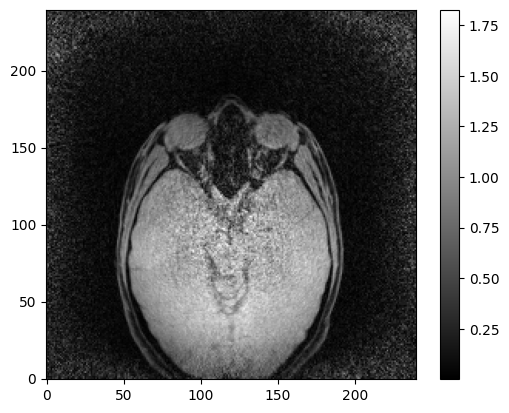

In [10]:
import matplotlib.pyplot as plt
plt.imshow(data[:, :, data.shape[2]//2].T, cmap="gray", origin="lower")
plt.colorbar()
plt.show()


reshape mathilda --> mathildares

In [19]:
import nibabel as nib
import numpy as np
from pathlib import Path
import os
import re

os.chdir("/home/debi/jaime/repos/MR-EyeTrack/results/bids/derivatives/reconstructions")

sub = "001"  # Change as needed
anat_dir = f"sub-{sub}/anat"

# --- List of input files ---
files = [
    f"{anat_dir}/sub-{sub}_acq-left_rec-mathilda95p_T1w.nii.gz",
    f"{anat_dir}/sub-{sub}_acq-left_rec-mathilda50p_T1w.nii.gz",
    f"{anat_dir}/sub-{sub}_acq-down_rec-mathilda75p_T1w.nii.gz",
    f"{anat_dir}/sub-{sub}_acq-left_rec-mathildafull_T1w.nii.gz",
    f"{anat_dir}/sub-{sub}_acq-down_rec-mathildafull_T1w.nii.gz",
    f"{anat_dir}/sub-{sub}_acq-right_rec-mathilda75p_T1w.nii.gz",
    f"{anat_dir}/sub-{sub}_acq-down_rec-mathilda95p_T1w.nii.gz",
    f"{anat_dir}/sub-{sub}_acq-right_rec-mathilda95p_T1w.nii.gz",
    f"{anat_dir}/sub-{sub}_rec-mathildaFull_T1w.nii.gz",
    f"{anat_dir}/sub-{sub}_acq-left_rec-mathilda75p_T1w.nii.gz",
    f"{anat_dir}/sub-{sub}_acq-up_rec-mathilda95p_T1w.nii.gz",
    f"{anat_dir}/sub-{sub}_acq-down_rec-mathilda50p_T1w.nii.gz",
    f"{anat_dir}/sub-{sub}_acq-up_rec-mathilda50p_T1w.nii.gz",
    f"{anat_dir}/sub-{sub}_acq-up_rec-mathilda75p_T1w.nii.gz",
    f"{anat_dir}/sub-{sub}_acq-right_rec-mathildafull_T1w.nii.gz",
    f"{anat_dir}/sub-{sub}_acq-up_rec-mathildafull_T1w.nii.gz",
    f"{anat_dir}/sub-{sub}_acq-right_rec-mathilda50p_T1w.nii.gz"
]

print(f"Found {len(files)} files to process.")

target_min, target_max = 0.0, 1000.0

print(f"\nRemapping mathilda reconstructions so intensities span {target_min}–{target_max}\n")

results = []
for f in files:
    p = Path(f)
    if not p.exists():
        print(f"⚠️  Missing file: {f}")
        continue

    print(f"Processing {f} ...")
    img = nib.load(str(p))
    data = img.get_fdata().astype(float)
    data = np.nan_to_num(data, nan=0.0)
    data[data < 0] = 0.0

    pos = data[data > 0]
    if pos.size == 0:
        print("  ❌ No positive voxels found, skipping.")
        continue

    # Use percentiles for robust scaling
    p01 = np.percentile(pos, 1)
    p99 = np.percentile(pos, 99)
    if p99 <= p01:
        print("  ❌ Invalid intensity range, skipping.")
        continue

    # Linear rescaling between p01–p99 → target_min–target_max
    data_scaled = np.clip((data - p01) / (p99 - p01), 0, 1)
    data_scaled = data_scaled * (target_max - target_min) + target_min

    out_img = nib.Nifti1Image(data_scaled.astype('float32'), img.affine, img.header)
    hdr = out_img.header
    try:
        hdr['scl_slope'] = 1.0
        hdr['scl_inter'] = 0.0
    except Exception:
        pass

    # --- Renaming rule: replace "mathildaXXp" with "mathildaresXXp" ---
    new_name = re.sub(r"mathilda(\d+p|full|Full)", r"mathildares\1", p.name)
    out_path = p.with_name(new_name)

    nib.save(out_img, str(out_path))
    print(f"  ✅ Saved: {out_path.name} (p01={p01:.4f}, p99={p99:.4f}, new min={data_scaled.min():.2f}, new max={data_scaled.max():.2f})")

    results.append((f, p01, p99, data_scaled.min(), data_scaled.max()))

# --- Summary ---
if results:
    print("\nSummary (p01 → p99 → new range):")
    for f, p01, p99, newmin, newmax in results:
        print(f"{f:60s}  p01={p01:8.4f}  p99={p99:8.4f}  new_range=({newmin:8.2f}–{newmax:8.2f})")
else:
    print("\nNo files processed successfully.")


Found 17 files to process.

Remapping mathilda reconstructions so intensities span 0.0–1000.0

Processing sub-001/anat/sub-001_acq-left_rec-mathilda95p_T1w.nii.gz ...
  ✅ Saved: sub-001_acq-left_rec-mathildares95p_T1w.nii.gz (p01=0.0178, p99=1.2980, new min=0.00, new max=1000.00)
Processing sub-001/anat/sub-001_acq-left_rec-mathilda50p_T1w.nii.gz ...
  ✅ Saved: sub-001_acq-left_rec-mathildares50p_T1w.nii.gz (p01=0.0169, p99=1.3113, new min=0.00, new max=1000.00)
Processing sub-001/anat/sub-001_acq-down_rec-mathilda75p_T1w.nii.gz ...
  ✅ Saved: sub-001_acq-down_rec-mathildares75p_T1w.nii.gz (p01=0.0171, p99=1.3056, new min=0.00, new max=1000.00)
Processing sub-001/anat/sub-001_acq-left_rec-mathildafull_T1w.nii.gz ...
  ✅ Saved: sub-001_acq-left_rec-mathildaresfull_T1w.nii.gz (p01=0.0156, p99=1.2913, new min=0.00, new max=1000.00)
Processing sub-001/anat/sub-001_acq-down_rec-mathildafull_T1w.nii.gz ...
  ✅ Saved: sub-001_acq-down_rec-mathildaresfull_T1w.nii.gz (p01=0.0158, p99=1.2921, ne

mathildares

In [20]:
import nibabel as nib
import numpy as np

img4 = nib.load("/home/debi/jaime/repos/MR-EyeTrack/results/bids/derivatives/reconstructions/sub-001/anat/sub-001_acq-down_rec-mathildares50p_T1w.nii.gz")
data4 = img4.get_fdata()

print("Shape:", data4.shape)
print("Data type:", data4.dtype)
print("Min:", np.nanmin(data4))
print("Max:", np.nanmax(data4))
print("Mean:", np.nanmean(data4))
print("Std Dev:", np.nanstd(data4))
print("Unique NaNs:", np.isnan(data4).sum())
print("Unique zeros:", np.sum(data4 == 0))

Shape: (240, 240, 240)
Data type: float64
Min: 0.0
Max: 1000.0
Mean: 235.8142048998037
Std Dev: 238.88883857714637
Unique NaNs: 0
Unique zeros: 138240


comparison table

In [21]:
import pandas as pd

# Collect stats for each dataset
stats = [
    {
        "Name": "mathilda",
        "Data Type": data.dtype,
        "Min": np.nanmin(data),
        "Max": np.nanmax(data),
        "Mean": np.nanmean(data),
        "Std": np.nanstd(data)
    },
    {
        "Name": "steva",
        "Data Type": data2.dtype,
        "Min": np.nanmin(data2),
        "Max": np.nanmax(data2),
        "Mean": np.nanmean(data2),
        "Std": np.nanstd(data2)
    },
    {
        "Name": "ship ref",
        "Data Type": data3.dtype,
        "Min": np.nanmin(data3),
        "Max": np.nanmax(data3),
        "Mean": np.nanmean(data3),
        "Std": np.nanstd(data3)
    },
    {
        "Name": "mathildares",
        "Data Type": data4.dtype,  # Assuming mathildares uses the same variable as mathilda
        "Min": np.nanmin(data4),
        "Max": np.nanmax(data4),
        "Mean": np.nanmean(data4),
        "Std": np.nanstd(data4)
    }
]

df_stats = pd.DataFrame(stats)
print(df_stats)

          Name Data Type       Min          Max        Mean         Std
0     mathilda   float64  0.000009     3.033547    0.323457    0.312408
1        steva   float64  0.000006     2.617967    0.221707    0.367458
2     ship ref   float64  0.000000  1373.000000  167.471509  207.197639
3  mathildares   float64  0.000000  1000.000000  235.814205  238.888839


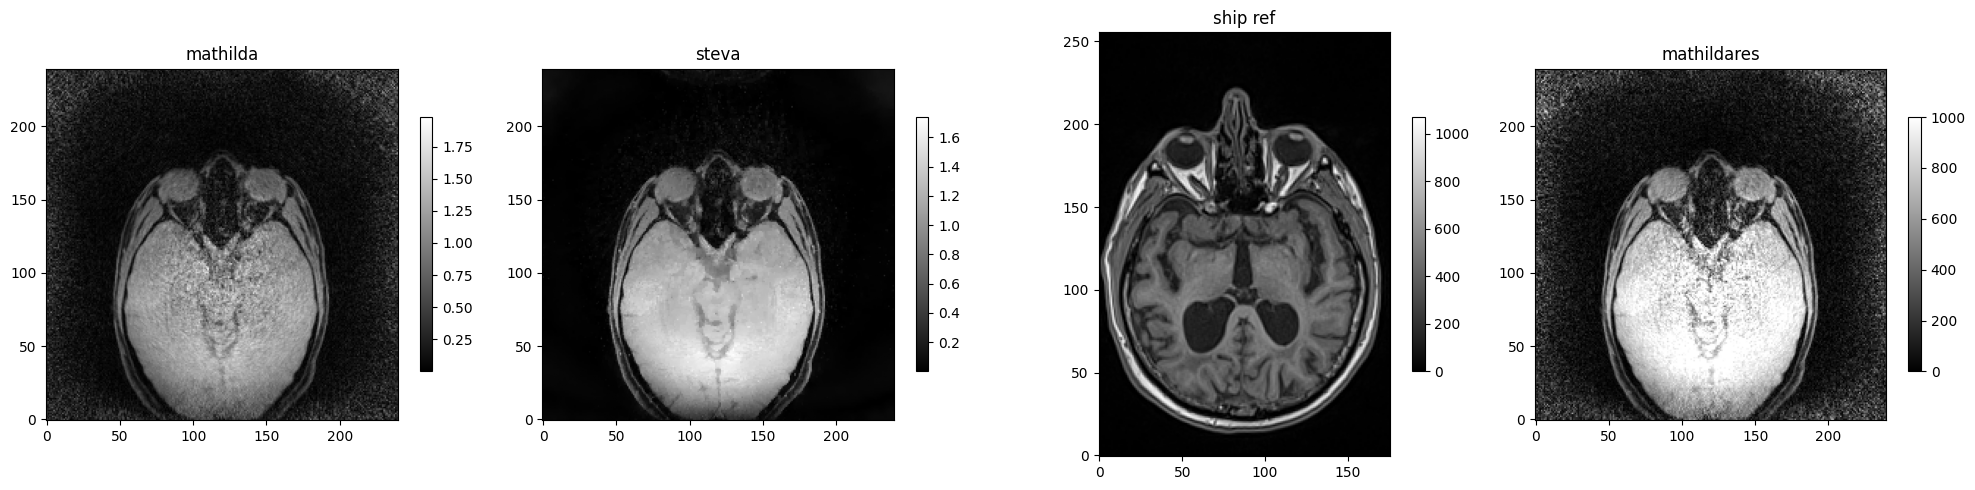

In [22]:
import matplotlib.pyplot as plt

datasets = [
    ("mathilda", data),
    ("steva", data2),
    ("ship ref", data3),
    ("mathildares", data4)
]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for ax, (title, arr) in zip(axes, datasets):
    im = ax.imshow(arr[:, :, arr.shape[2]//2].T, cmap="gray", origin="lower")
    ax.set_title(title)
    fig.colorbar(im, ax=ax, shrink=0.6)
plt.tight_layout()
plt.show()

remove mathildares files

In [43]:
import os

anat_dir_path = "/home/debi/jaime/repos/MR-EyeTrack/results/bids/derivatives/reconstructions/sub-001/anat"
for fname in os.listdir(anat_dir_path):
    if "mathildares" in fname:
        fpath = os.path.join(anat_dir_path, fname)
        try:
            os.remove(fpath)
            print(f"Removed: {fname}")
        except Exception as e:
            print(f"Error removing {fname}: {e}")

Removed: sub-001_acq-up_rec-mathildares75p_T1w.nii.gz
Removed: sub-001_acq-down_rec-mathildaresfull_T1w.nii.gz
Removed: sub-001_acq-up_rec-mathildaresfull_T1w.nii.gz
Removed: sub-001_acq-right_rec-mathildares75p_T1w.nii.gz
Removed: sub-001_acq-left_rec-mathildares50p_T1w.nii.gz
Removed: sub-001_acq-left_rec-mathildaresfull_T1w.nii.gz
Removed: sub-001_acq-down_rec-mathildares50p_T1w.nii.gz
Removed: sub-001_acq-right_rec-mathildaresfull_T1w.nii.gz
Removed: sub-001_acq-up_rec-mathildares95p_T1w.nii.gz
Removed: sub-001_rec-mathildaresFull_T1w.nii.gz
Removed: sub-001_acq-down_rec-mathildares75p_T1w.nii.gz
Removed: sub-001_acq-right_rec-mathildares95p_T1w.nii.gz
Removed: sub-001_acq-left_rec-mathildares75p_T1w.nii.gz
Removed: sub-001_acq-left_rec-mathildares95p_T1w.nii.gz
Removed: sub-001_acq-down_rec-mathildares95p_T1w.nii.gz
Removed: sub-001_acq-right_rec-mathildares50p_T1w.nii.gz
Removed: sub-001_acq-up_rec-mathildares50p_T1w.nii.gz


diagnostic script mathilda -- inside mriqc docker container

In [35]:
# diagnostic_mriqc_mathilda_check_res50p.py
import nibabel as nib
import numpy as np
import os
from pathlib import Path

paths = {
    "in_file": "/tmp/work/mriqc_wf/anatMRIQC/d6d9f7661715b58475fb3d03ec21b2d2f37c2286/conform/sub-001_acq-down_rec-mathildares50p_T1w_conformed.nii.gz",
    "in_bias": "/tmp/work/mriqc_wf/anatMRIQC/synthstrip_wf/d6d9f7661715b58475fb3d03ec21b2d2f37c2286/post_n4/clipped_bias.nii.gz",
    "in_noinu": "/tmp/work/mriqc_wf/anatMRIQC/ComputeIQMs/d6d9f7661715b58475fb3d03ec21b2d2f37c2286/harmonize/clipped_corrected_harmonized_fixed.nii.gz",
    "in_segm": "/tmp/work/mriqc_wf/anatMRIQC/brain_tissue_segmentation/d6d9f7661715b58475fb3d03ec21b2d2f37c2286/segmentation/segment.nii.gz",
    "pvms1": "/tmp/work/mriqc_wf/anatMRIQC/brain_tissue_segmentation/d6d9f7661715b58475fb3d03ec21b2d2f37c2286/segmentation/segment_01.nii.gz",
    "pvms2": "/tmp/work/mriqc_wf/anatMRIQC/brain_tissue_segmentation/d6d9f7661715b58475fb3d03ec21b2d2f37c2286/segmentation/segment_02.nii.gz",
    "pvms3": "/tmp/work/mriqc_wf/anatMRIQC/brain_tissue_segmentation/d6d9f7661715b58475fb3d03ec21b2d2f37c2286/segmentation/segment_03.nii.gz",
    "head_msk": "/tmp/work/mriqc_wf/anatMRIQC/HeadMaskWorkflow/d6d9f7661715b58475fb3d03ec21b2d2f37c2286/GradientThreshold/clipped_corrected_enhanced_grad_gradmask.nii.gz",
    "air_msk": "/tmp/work/mriqc_wf/anatMRIQC/AirMaskWorkflow/d6d9f7661715b58475fb3d03ec21b2d2f37c2286/ArtifactMask/sub-001_acq-down_rec-mathildares50p_T1w_conformed.nii_air.nii.gz",
    "artifact_msk": "/tmp/work/mriqc_wf/anatMRIQC/AirMaskWorkflow/d6d9f7661715b58475fb3d03ec21b2d2f37c2286/ArtifactMask/sub-001_acq-down_rec-mathildares50p_T1w_conformed.nii_art.nii.gz",
    "rot_msk": "/tmp/work/mriqc_wf/anatMRIQC/AirMaskWorkflow/d6d9f7661715b58475fb3d03ec21b2d2f37c2286/RotationMask/sub-001_acq-down_rec-mathildares50p_T1w_conformed_rotmask.nii.gz",
}

def file_stats(p):
    if not os.path.exists(p):
        return f" MISSING: {p}"
    img = nib.load(p)
    data = img.get_fdata()
    stats = {
        "shape": data.shape,
        "dtype": data.dtype,
        "min": float(np.nanmin(data)),
        "max": float(np.nanmax(data)),
        "mean": float(np.nanmean(data)),
        "std": float(np.nanstd(data)),
        "nan_count": int(np.isnan(data).sum()),
        "zero_count": int((data == 0).sum()),
        "nonzero_count": int((data != 0).sum()),
        "scl_slope": getattr(img.header, "get_slope_inter", lambda: (None, None))(),
    }
    # percentiles
    pcts = np.percentile(data[~np.isnan(data)].ravel(), [0.1, 1, 5, 25, 50, 75, 95, 99, 99.9])
    stats["percentiles"] = {k: v for k, v in zip([0.1, 1, 5, 25, 50, 75, 95, 99, 99.9], pcts)}
    return stats, img

def mask_overlap(img_data, mask_data):
    mask_bool = mask_data != 0
    if mask_bool.sum() == 0:
        return {"mask_voxels": 0, "masked_nonzero_voxels": 0, "masked_mean": None}
    masked_vals = img_data[mask_bool]
    return {
        "mask_voxels": int(mask_bool.sum()),
        "masked_nonzero_voxels": int((masked_vals != 0).sum()),
        "masked_mean": float(np.nanmean(masked_vals)),
        "masked_min": float(np.nanmin(masked_vals)),
        "masked_max": float(np.nanmax(masked_vals)),
    }

results = {}
loaded = {}

for k, p in paths.items():
    if not os.path.exists(p):
        print(f"{k}: MISSING -> {p}")
        continue
    stats, img = file_stats(p)
    results[k] = stats
    loaded[k] = img
    print(f"\n=== {k} ===")
    for s, v in stats.items():
        if s == "percentiles":
            print(" percentiles:", ", ".join([f"{k}:{v:.4g}" for k, v in v.items()]))
        elif s == "scl_slope":
            print(" header slope/inter:", v)
        else:
            print(f" {s}: {v}")

# If we have an in_file and head mask, compute overlap
if "in_file" in loaded and "head_msk" in loaded:
    img = loaded["in_file"].get_fdata()
    m = loaded["head_msk"].get_fdata()
    ov = mask_overlap(img, m)
    print("\n-- overlap in_file vs head_msk --")
    print(ov)

# Check bias-corrected and harmonized specifically
for key in ("in_bias", "in_noinu"):
    if key in loaded:
        data = loaded[key].get_fdata()
        tiny_thresh = 1e-6
        print(f"\n{key}: voxels <= {tiny_thresh}: {(data <= tiny_thresh).sum()}/{data.size} ({100 * (data <= tiny_thresh).sum() / data.size:.3f}%)")

print("\nDone.")



=== in_file ===
 shape: (240, 240, 240)
 dtype: float64
 min: 0.0
 max: 1000.0
 mean: 235.8142048998037
 std: 238.88883857714637
 nan_count: 0
 zero_count: 138240
 nonzero_count: 13685760
 header slope/inter: (None, None)
 percentiles: 0.1:0, 1:1.995e-07, 5:17.02, 25:67.63, 50:145.3, 75:311.8, 95:790.6, 99:1000, 99.9:1000

=== in_bias ===
 shape: (240, 240, 240)
 dtype: float64
 min: 0.1596270650625229
 max: 0.8359838724136353
 mean: 0.4733407865306395
 std: 0.15109154115532206
 nan_count: 0
 zero_count: 0
 nonzero_count: 13824000
 header slope/inter: (None, None)
 percentiles: 0.1:0.1673, 1:0.1837, 5:0.23, 25:0.3555, 50:0.47, 75:0.594, 95:0.7213, 99:0.7742, 99.9:0.8064

=== in_noinu ===
 shape: (240, 240, 240)
 dtype: float64
 min: 0.0
 max: 0.0
 mean: 0.0
 std: 0.0
 nan_count: 0
 zero_count: 13824000
 nonzero_count: 0
 header slope/inter: (None, None)
 percentiles: 0.1:0, 1:0, 5:0, 25:0, 50:0, 75:0, 95:0, 99:0, 99.9:0

=== in_segm ===
 shape: (240, 240, 240)
 dtype: float64
 min: 0.

check header

In [ ]:
import nibabel as nib
from pprint import pprint

# Path to your harmonized file
nii_path = "/tmp/work/mriqc_wf/anatMRIQC/ComputeIQMs/d6d9f7661715b58475fb3d03ec21b2d2f37c2286/harmonize/clipped_corrected_harmonized_fixed.nii.gz"

img = nib.load(nii_path)
hdr = img.header

print("=== Basic info ===")
print("Filename:", nii_path)
print("Shape:", img.shape)
print("Affine:\n", img.affine)
print("Datatype:", hdr.get_data_dtype())
print("Voxel dimensions (pixdim):", hdr.get_zooms())
print("qform_code:", hdr["qform_code"])
print("sform_code:", hdr["sform_code"])
print("qoffset_x/y/z:", (hdr["qoffset_x"], hdr["qoffset_y"], hdr["qoffset_z"]))
print("scl_slope:", hdr["scl_slope"])
print("scl_inter:", hdr["scl_inter"])
print("qfac:", hdr["pixdim"][0])
print("xyzt_units:", hdr.get_xyzt_units())

print("\n=== Full header dump ===")
pprint(dict(hdr))


In [37]:
import nibabel as nib
import numpy as np

f = "/tmp/work/mriqc_wf/anatMRIQC/ComputeIQMs/d6d9f7661715b58475fb3d03ec21b2d2f37c2286/harmonize/clipped_corrected_harmonized_fixed.nii.gz"
img = nib.load(f)
raw = img.dataobj.get_unscaled()  # bypass nibabel’s scaling
raw_data = np.asanyarray(raw)

print("Raw dtype:", raw_data.dtype)
print("Raw min/max:", raw_data.min(), raw_data.max())
print("Mean:", raw_data.mean())


Raw dtype: int16
Raw min/max: 0 0
Mean: 0.0


fix header

In [32]:
import nibabel as nib

f = "/tmp/work/mriqc_wf/anatMRIQC/ComputeIQMs/d6d9f7661715b58475fb3d03ec21b2d2f37c2286/harmonize/clipped_corrected_harmonized.nii.gz"
img = nib.load(f)
hdr = img.header.copy()
hdr["scl_slope"] = 1.0
hdr["scl_inter"] = 0.0

fixed = nib.Nifti1Image(img.get_fdata(), img.affine, header=hdr)
out = f.replace(".nii.gz", "_fixed.nii.gz")
nib.save(fixed, out)
print("Saved:", out)


Saved: /tmp/work/mriqc_wf/anatMRIQC/ComputeIQMs/d6d9f7661715b58475fb3d03ec21b2d2f37c2286/harmonize/clipped_corrected_harmonized_fixed.nii.gz


check WM mask

In [39]:
import nibabel as nib
import numpy as np

wm_mask_file = "/tmp/work/mriqc_wf/anatMRIQC/brain_tissue_segmentation/d6d9f7661715b58475fb3d03ec21b2d2f37c2286/segmentation/segment_03.nii.gz"
wm = nib.load(wm_mask_file).get_fdata()
print("WM mask stats:", wm.min(), wm.max(), np.count_nonzero(wm))


WM mask stats: 0.0 0.9378914833068848 1515210


WM mask thresholds

In [2]:
import nibabel as nib
import numpy as np

# Path to your WM mask (segment_03.nii.gz)
wm_mask_path = "/tmp/work/mriqc_wf/anatMRIQC/brain_tissue_segmentation/696cb6711b0c855ace8b4f901cec40acf6240be1/segmentation/segment_03.nii.gz"

wm_img = nib.load(wm_mask_path)
wm_data = wm_img.get_fdata()

# Thresholds to evaluate
thresholds = np.arange(0.5, 1.01, 0.05)  # from 0.5 to 1.0 in steps of 0.05

print("Thresh\tVoxels above\tFraction (%)")
for t in thresholds:
    vox_above = (wm_data >= t).sum()
    frac = vox_above / wm_data.size * 100
    print(f"{t:.2f}\t{vox_above}\t{frac:.3f}")


Thresh	Voxels above	Fraction (%)
0.50	773481	5.595
0.55	690179	4.993
0.60	568496	4.112
0.65	404890	2.929
0.70	229336	1.659
0.75	98459	0.712
0.80	29513	0.213
0.85	3962	0.029
0.90	1409	0.010
0.95	392	0.003
1.00	0	0.000
